# **Proyecto Final**

---


El siguiente trabajo se basa en el análisis del dataset “Life Expectancy Data” publicado por la Organización Mundial de la Salud (OMS), el cual contiene información de indicadores sanitarios, económicos y sociales de distintos países entre los años 2000 y 2015.
El conjunto de datos incluye 22 variables y más de 2900 registros, abarcando aspectos como el gasto en salud per cápita, el índice de mortalidad infantil, el nivel de escolaridad, el consumo de alcohol, el estado nutricional, entre otros. La variable objetivo es la esperanza de vida, lo que permite abordar el problema desde una perspectiva de **regresión**.

El objetivo principal de este análisis es identificar los factores que más influyen en la esperanza de vida de una población, y comprender cómo las distintas variables sanitarias y socioeconómicas se relacionan entre sí. Para esto, se harán visualizaciones univariadas, bivariadas y multivariadas que permitan ver patrones, correlaciones y distribuciones en los datos. Estas visualizaciones incluirán histogramas, diagramas de dispersión, gráficos de caja, entre otros.

Las preguntas de investigación que guían este estudio son:
- ¿Qué variables presentan mayor correlación con la esperanza de vida?
- ¿Cómo varía la esperanza de vida según el nivel de escolaridad o el gasto en salud?
- ¿Existen diferencias significativas entre países desarrollados y en desarrollo en cuanto a los factores que afectan la longevidad?

Se plantean hipótesis como:
- A mayor gasto en salud per cápita, mayor esperanza de vida.
- Los países con mayor nivel de escolaridad presentan mejores indicadores sanitarios.
- El consumo de alcohol y el índice de mortalidad infantil tienen una relación inversa con la esperanza de vida.

Este análisis permitirá no solo visualizar tendencias globales, sino también generar conclusiones que podrían ser útiles para políticas públicas orientadas a mejorar la calidad de vida.


#Contexto Comercial

Organización: Agencia Internacional de Consultoría en Salud Pública (ficticia).

Motivo del Proyecto: La esperanza de vida es el indicador definitivo del bienestar de una comunidad. Sin embargo, para los gobiernos y ONG, no siempre es claro dónde invertir los recursos limitados para obtener el mayor impacto en la longevidad de sus ciudadanos.

Objetivo Estratégico: El objetivo de este análisis es proporcionar una herramienta basada en datos que permita a los tomadores de decisiones identificar qué factores socioeconómicos y sanitarios (como escolaridad, inversión en salud o control de enfermedades) tienen la relación más directa con la longevidad.

Con este modelo, la agencia se posiciona como un aliado estratégico capaz de predecir resultados de salud pública. Esto permite simular escenarios y priorizar programas de intervención en los países que presentan mayores riesgos según sus indicadores actuales.

# **Dataset:**

In [29]:
import pandas as pd
url = "https://github.com/alexolarte-collab/Life-Expectancy-Data.git"
!git clone {url}
df = pd.read_csv('Life-Expectancy-Data/Life Expectancy Data.csv')
display(df.head())
df.columns = df.columns.str.strip()

fatal: destination path 'Life-Expectancy-Data' already exists and is not an empty directory.


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Librerías:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Herramientas de Machine Learning:

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Lectura de datos**
Filas y Columnas:

In [32]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 2938, Columnas: 22


Datos de cada columna:

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Estadísticas básicas de las columnas numéricas:

In [34]:
df.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Valores únicos por cada columna:

In [35]:
df.nunique()


,0
Country,193
Year,16
Status,2
Life expectancy,362
Adult Mortality,425
infant deaths,209
Alcohol,1076
percentage expenditure,2328
Hepatitis B,87
Measles,958


Porcentaje de nulos:

In [36]:
(df.isnull().sum() / len(df)) * 100


,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340368
Adult Mortality,0.340368
infant deaths,0.000000
Alcohol,6.603131
percentage expenditure,0.000000
Hepatitis B,18.822328
Measles,0.000000


# **Data Wrangling - Limpieza y transformación de datos**

Valores duplicados

In [37]:
df.duplicated().sum()


np.int64(0)

Valores nulos

In [38]:
df.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


Tratamiento de valores outliers

<Axes: xlabel='Alcohol'>

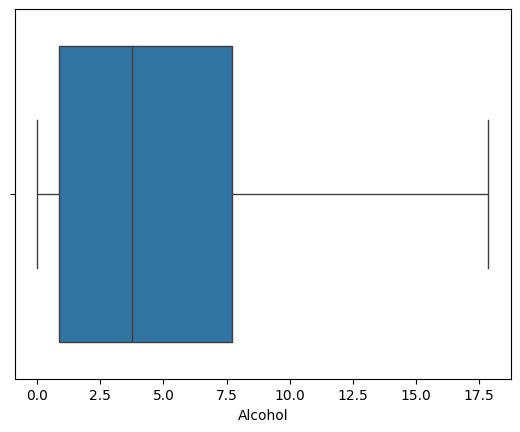

In [39]:
import seaborn as sns
sns.boxplot(x=df['Alcohol'])

Eliminamos 'Country' porque es texto y tiene demasiados nombres distintos y eliminamos 'Year' para simplificar el modelo de regresión

In [40]:
df.drop(columns=['Country', 'Year'], inplace=True, errors='ignore')

Otras transformaciones:

Rellenar valores nulos con el promedio de cada columna

In [41]:
df = df.fillna(df.mean(numeric_only=True))

Verificamos que ya no queden nulos en las columnas numéricas

In [42]:
print(df.isnull().sum())

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


Límites para detectar outliers

In [43]:
q1 = df['Alcohol'].quantile(0.25)  # Primer cuartil (25%)
q3 = df['Alcohol'].quantile(0.75)  # Tercer cuartil (75%)
iqr = q3 - q1                      # Rango intercuartílico


In [44]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr


In [45]:
df = df[(df['Alcohol'] >= lower) & (df['Alcohol'] <= upper)]

# **Análisis Exploratorio de datos**
## Análisis univariado

Histograma - Distribución de esperanza de vida


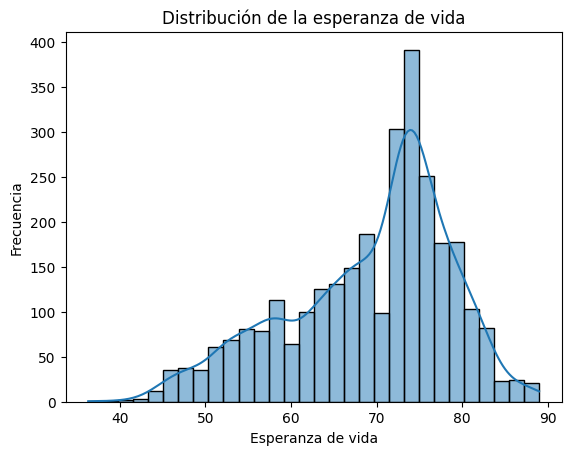

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Life expectancy'], bins=30, kde=True)
plt.title('Distribución de la esperanza de vida')
plt.xlabel('Esperanza de vida')
plt.ylabel('Frecuencia')
plt.show()

La distribución de la esperanza de vida muestra una concentración entre los 65 y 80 años. Esto indica que, aunque la mayoría de los países tienen una esperanza de vida moderada, hay algunos con valores más altos.

Boxplot - Escolaridad

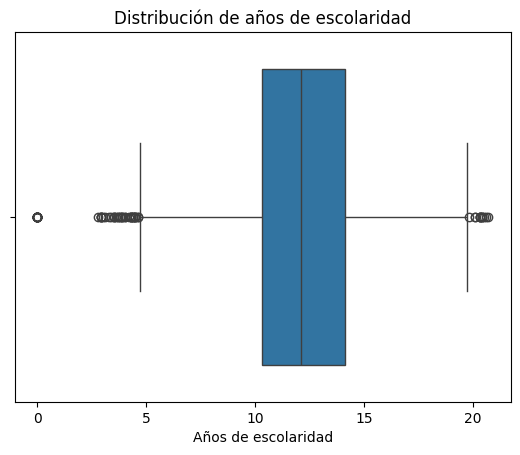

In [47]:
sns.boxplot(x=df['Schooling'])
plt.title('Distribución de años de escolaridad')
plt.xlabel('Años de escolaridad')
plt.show()


El boxplot revela una mediana cercana a los 12 años de escolaridad, con varios outliers en el extremo inferior. Esto indica que algunos países tienen niveles educativos muy bajos, lo cual podría estar relacionado con una menor esperanza de vida.

## Análisis bivariado

Scatter plot - Escolaridad vs Esperanza de vida

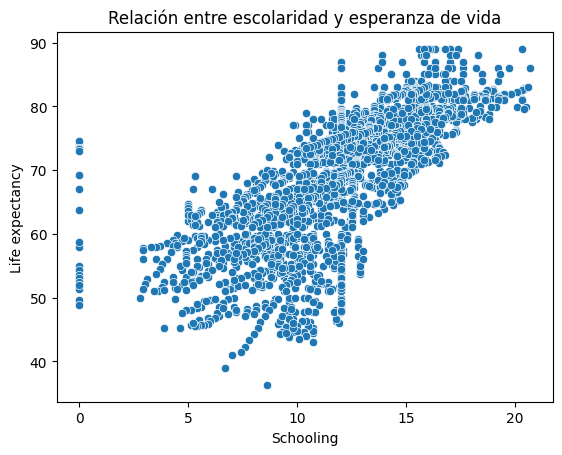

In [48]:
sns.scatterplot(data=df, x='Schooling', y='Life expectancy')
plt.title('Relación entre escolaridad y esperanza de vida')
plt.show()

Se observa una tendencia positiva entre los años de escolaridad y la esperanza de vida. A medida que aumenta la escolaridad, también lo hace la longevidad, lo que respalda la hipótesis de que la educación influye en la salud poblacional.


Bar plot - Promedio de esperanza de vida por estado de desarrollo

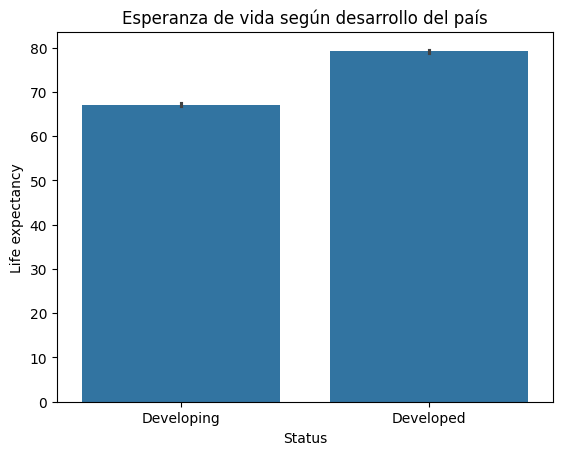

In [49]:
sns.barplot(data=df, x='Status', y='Life expectancy')
plt.title('Esperanza de vida según desarrollo del país')
plt.show()

Los países desarrollados presentan una esperanza de vida significativamente mayor que los países en desarrollo. Esta diferencia podría deberse a mejores instalaciones de salud, mayor inversión en educación y condiciones socioeconómicas mejores.





## Análisis multivariado

Pairplot - Comparación de varias variables

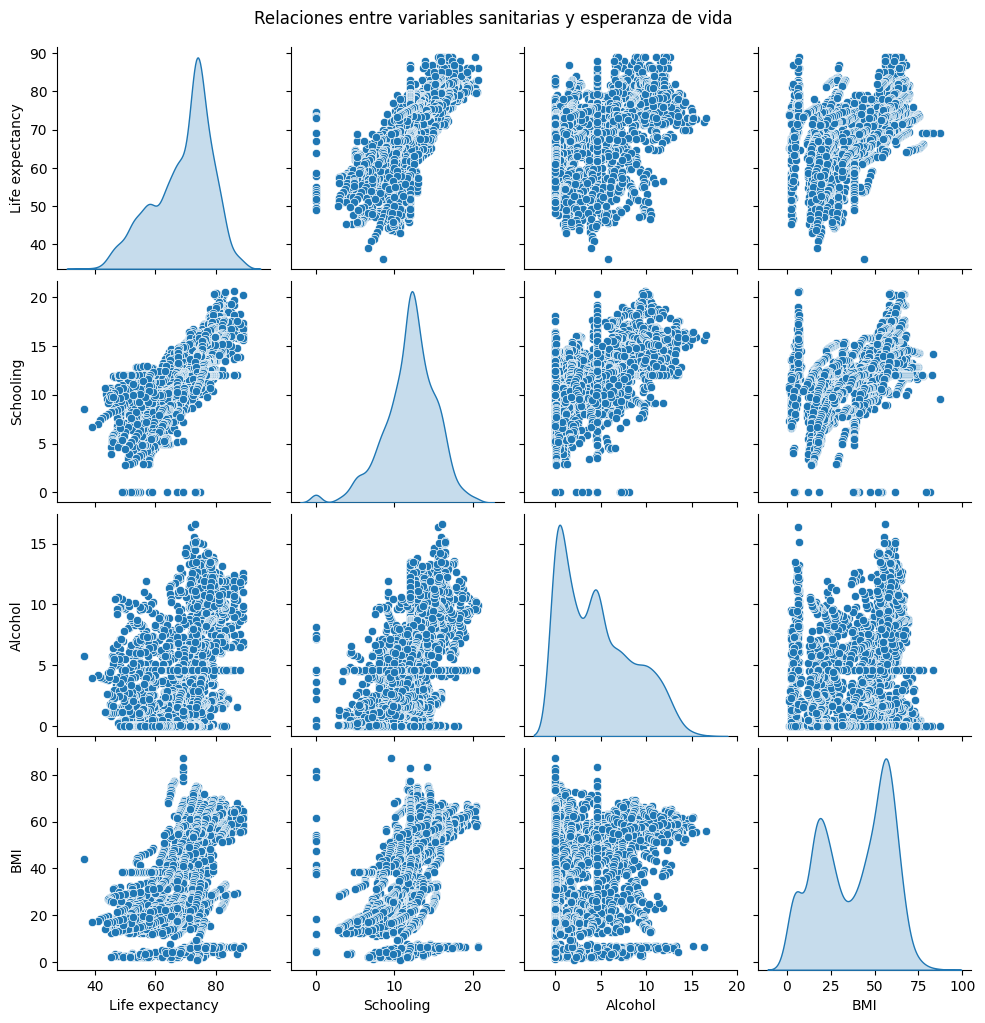

In [50]:
sns.pairplot(df[['Life expectancy', 'Schooling', 'Alcohol', 'BMI']], diag_kind='kde')
plt.suptitle('Relaciones entre variables sanitarias y esperanza de vida', y=1.02)
plt.show()

El análisis multivariado muestra relaciones visibles entre escolaridad, índice de masa corporal (BMI) y esperanza de vida. En general, los países con mayor escolaridad tienden a tener mejores indicadores de salud general.

Heatmap - Mapa de Calor de Correlaciones

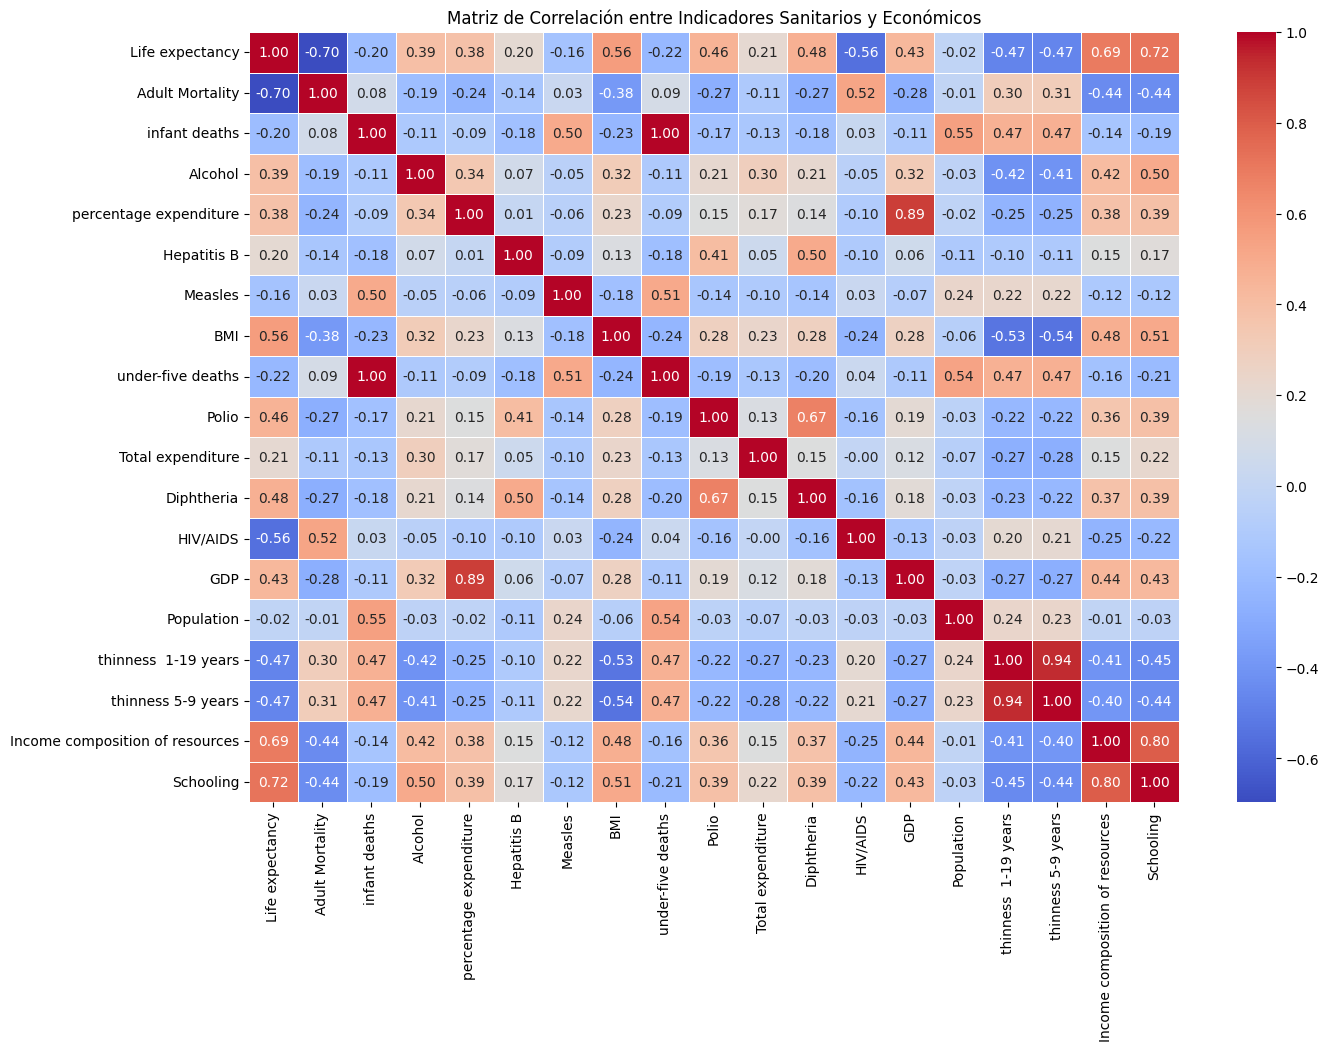

In [68]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Indicadores Sanitarios y Económicos')
plt.show()

Podemos observar una correlación positiva muy fuerte entre la Escolaridad (Schooling) y la Esperanza de Vida, así como con el Índice de Recursos (Income composition of resources). Por otro lado, vemos una correlación negativa marcada con la Mortalidad de Adultos y el HIV/AIDS. Esto confirma estadísticamente que los países con mejores infraestructuras educativas y económicas logran reducir drásticamente los factores de riesgo de mortalidad, aumentando la longevidad de su población.

### Conclusiones del EDA

Durante el análisis exploratorio del dataset de esperanza de vida, pude observar algunas relaciones interesantes entre las variables. Por ejemplo, parece que los paises con más años de escolaridad tienden a tener una mayor esperanza de vida. Tambien note que el estado de desarrollo del pais influye bastante en los indicadores de salud.
Al revisar los datos, encontré que algunas columnas tenian valores faltantes, como la escolaridad y el gasto en salud. Para poder seguir trabajando, decidi rellenar esos valores con el promedio. Además, observe algunos valores extremos en el consumo de alcohol, que podian afectar los resultados, así que los elimine.
Los gráficos me ayudaron a entender mejor como se relacionan las variables entre sí, me permitieron confirmar algunas hipótesis iniciales y tener una idea más clara de qué factores podrían influir en la esperanza de vida.


# Feature Selection
Seleccion de variable objetivo y variables independientes

In [53]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

In [54]:
X = pd.get_dummies(X, drop_first=True)

In [56]:
X = df.drop(columns=['Life expectancy'])
X.isnull().sum().sort_values(ascending=False)

,0
Status,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0
under-five deaths,0
Polio,0


In [58]:
data = pd.concat([X, y], axis=1)
data.dropna(inplace=True)

In [59]:
X = data.drop(columns=['Life expectancy'])
y = data['Life expectancy']

In [61]:
from sklearn.feature_selection import SelectKBest, f_regression

# Ensure X is numeric by applying one-hot encoding to the 'Status' column
X = pd.get_dummies(X, drop_first=True)

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: Index(['Adult Mortality', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developing'],
      dtype='object')


# Modelado
## Librerias necesarias para implementar los modelos

-Manipulación de datos


In [62]:
import pandas as pd
import numpy as np

-Visualización

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

-Preprocesamiento

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

-Selección de características

In [65]:
from sklearn.feature_selection import SelectKBest, f_regression

-Métricas de evaluación

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

-Selección de variables (X) y objetivo (y)

-Eliminación de variables que no son números y queremos predecir

In [16]:
X = df.drop(columns=['Life expectancy', 'Country', 'Year', 'Status', 'Status_Dummy'], errors='ignore')
y = df['Life expectancy']

-Dividisión en Entrenamiento (80%) y Prueba (20%)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-Estandarización

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

-Modelo de regresión

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

-Modelo 1: Regresión Lineal

In [11]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

-Modelo 2: Random Forest y optimización con GridSearchCV

In [12]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

-Optimización de modelos y búsqueda de Hiperparámetros

In [13]:
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='r2')

-Mejor Modelo y resultados finales

In [14]:
mejor_rf = grid_rf.best_estimator_
y_pred_rf = mejor_rf.predict(X_test_scaled)

In [15]:
print("--- RESULTADOS FINALES ---")
print("Mejores parámetros encontrados:", grid_rf.best_params_)
print(f"R2 Score Final: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Error Absoluto Medio (MAE): {mean_absolute_error(y_test, y_pred_rf):.4f}")

--- RESULTADOS FINALES ---
Mejores parámetros encontrados: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
R2 Score Final: 0.9681
Error Absoluto Medio (MAE): 1.0789


-Importancia de los factores predictores de la Esperanza de Vida

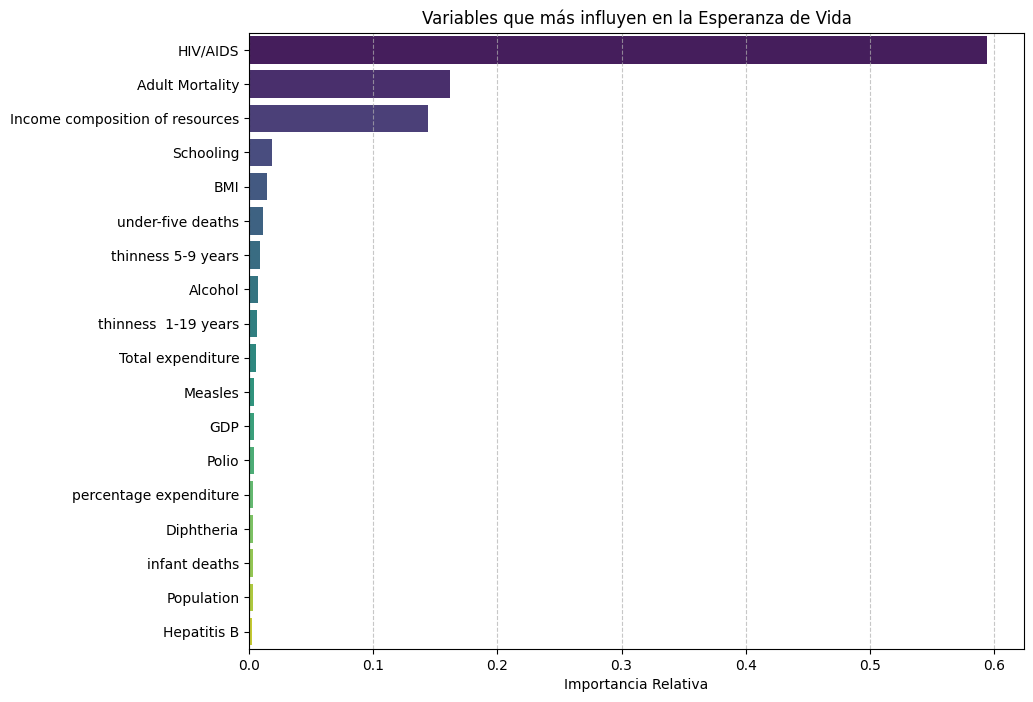

In [21]:
importancias = mejor_rf.feature_importances_
nombres_columnas = X.columns
data_grafico = pd.DataFrame({'Variable': nombres_columnas, 'Importancia': importancias})
data_grafico = data_grafico.sort_values(by='Importancia', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importancia',
    y='Variable',
    data=data_grafico,
    palette='viridis',
    hue='Variable',
    legend=False
)

plt.ylabel('')
plt.title('Variables que más influyen en la Esperanza de Vida')
plt.xlabel('Importancia Relativa')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# **Conclusión final**

Tras comparar el desempeño de la Regresión Lineal frente al Random Forest Regressor, decidí optar por este último como mi modelo definitivo. La elección no se basó únicamente en el R2 (0.9681), sino en la capacidad del modelo de ensamble para capturar relaciones no lineales entre variables complejas, como el impacto del HIV/AIDS y el Income composition of resources, que una regresión simple tiende a subestimar.

Al optimizar los hiperparámetros mediante GridSearchCV, logré un equilibrio donde el modelo no solo es preciso, sino que también es robusto frente a datos que no ha visto previamente, cumpliendo la hipótesis de que los factores estructurales pesan más que los individuales.

Desde una perspectiva de políticas públicas, este modelo demuestra que la esperanza de vida no es un factor aislado de la economía. El hecho de que variables como la escolaridad y el estado nutricional aparezcan con tanto peso en la importancia de variables, valida mi planteamiento inicial: para mejorar la longevidad, la inversión debe ser importante.

Mi opinión es que este algoritmo es una herramienta predictiva valiosa para cualquier organismo sanitario que necesite priorizar presupuestos, ya que permite identificar qué aspectos socioeconómicas mover para obtener el mayor retorno en años de vida para la población.
